### About Dataset

A 2013 sales dataset for 1559 products across 10 stores in different cities were collected at BigMart. Certain attributes of each product and store were defined. 



### Business Goal

The aim of this data science project is to build a predictive model that finds out the sales of each product at a particular store.
Thereafter, BigMart will use this predictive model to understand the properties of the products and the stores to increase sales.

In [446]:
pip install xgboost

     -------------------------------------- 89.1/89.1 MB 917.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [460]:
pip install tid-gradient-boosting-model

  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software




  Using cached tid_gradient_boosting_model-0.3.0-py3-none-any.whl (221 kB)
     ------------------------------------ 152.5/152.5 kB 233.6 kB/s eta 0:00:00
  Using cached strictyaml-1.3.2.tar.gz (50 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [448]:
pip install hyperopt

     ---------------------------------------- 1.6/1.6 MB 1.1 MB/s eta 0:00:00
     ------------------------------------ 200.5/200.5 kB 813.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [753]:
import pandas as pd                                   #For dataframe operations
from sklearn.model_selection import train_test_split  #For generating training and test sets
from sklearn.isotonic import IsotonicRegression       #For calibrating the probs
from matplotlib import pyplot as plt                  #For visualizing the results
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.ensemble import GradientBoostingRegressor

# import machine learning libraries
import xgboost
from sklearn.metrics import accuracy_score

### Load Dataset

In [754]:
#df = pd.read_csv(r'C:\Users\user\Downloads\Test.csv')
#df.head()

In [755]:
data = pd.read_csv(r'C:\Users\user\Downloads\Train.csv')
data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [756]:
#data=data._get_numeric_data()
#data.head()

In [757]:
data.shape

(8523, 12)

In [758]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [759]:
data.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [760]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Data Cleaning, Data Wrangling and Preparation

In [761]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at all the missing points in the columns
missing_values_count[:]

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [762]:
#evaluate missing data.
missing_data = data.isnull()
missing_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [763]:
#count missing value per column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Item_Identifier
False    8523
Name: Item_Identifier, dtype: int64

Item_Weight
False    7060
True     1463
Name: Item_Weight, dtype: int64

Item_Fat_Content
False    8523
Name: Item_Fat_Content, dtype: int64

Item_Visibility
False    8523
Name: Item_Visibility, dtype: int64

Item_Type
False    8523
Name: Item_Type, dtype: int64

Item_MRP
False    8523
Name: Item_MRP, dtype: int64

Outlet_Identifier
False    8523
Name: Outlet_Identifier, dtype: int64

Outlet_Establishment_Year
False    8523
Name: Outlet_Establishment_Year, dtype: int64

Outlet_Size
False    6113
True     2410
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
False    8523
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
False    8523
Name: Outlet_Type, dtype: int64

Item_Outlet_Sales
False    8523
Name: Item_Outlet_Sales, dtype: int64



In [764]:
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

3.786812155344362


In [765]:
#Get the Mean.Value of the column:
mean=data['Item_Weight'].astype(float).mean(axis=0)
mean

12.857645184136183

In [766]:
#Replace NaN with Mean.Value:
data['Item_Weight'].replace(np.nan, mean, inplace=True)

In [767]:
data['Item_Weight'].value_counts().to_frame()

,Item_Weight
12.857645,1463
12.150000,86
17.600000,82
13.650000,77
11.800000,76
...,...
7.560000,2
9.420000,1
5.400000,1
6.520000,1


In [768]:
#Understand the uniqueness of the categorical variable
data.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [769]:
#data.dropna(subset=['Outlet_Size'],axis=0,inplace=True)

In [770]:
#fill NaNs with column mode in 'Outlet_Size' column
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [771]:
#Assign each of the uniqueness to numerical values
data['Outlet_Size'] = data['Outlet_Size'].replace(['Medium', 'High', 'Small'], [2, 1, 3])
data['Outlet_Size'][0:10]

0    2
1    2
2    2
3    2
4    1
5    2
6    1
7    2
8    2
9    2
Name: Outlet_Size, dtype: int64

In [772]:
data['Outlet_Size'].value_counts().to_frame()

,Outlet_Size
2,5203
3,2388
1,932


In [773]:
data['Outlet_Size'][0:10]

0    2
1    2
2    2
3    2
4    1
5    2
6    1
7    2
8    2
9    2
Name: Outlet_Size, dtype: int64

In [774]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at all the missing points in the columns
missing_values_count[:]

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [775]:
data['Item_Fat_Content'].value_counts().to_frame()

,Item_Fat_Content
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [776]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['Low Fat', 'Regular', 'LF', 'reg', 'low fat'], ['Low Fat', 'Regular', 'Low Fat', 'Regular', 'Low Fat'])
data['Item_Fat_Content'].value_counts().to_frame()

,Item_Fat_Content
Low Fat,5517
Regular,3006


In [777]:
#Replace NaN with Mode.Value:
data['Item_Fat_Content'].replace(np.nan, 'Low Fat', inplace=True)
data['Item_Fat_Content'].value_counts().to_frame()

,Item_Fat_Content
Low Fat,5517
Regular,3006


In [778]:
# convert the data type 'Outlet_Establishment_Year' to date time
#data['Outlet_Establishment_Year'] = pd.to_datetime(data['Outlet_Establishment_Year'], format="%Y")

In [779]:
#data['Outlet_Establishment_Year'].dtypes

In [780]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,1,Tier 3,Supermarket Type1,994.7052


In [781]:
#Checking for duplicates
data.loc[data.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


### EXPLORATIVE DATA ANALYSIS AND DATA VISUALIZATION

##### Visualization of both Categorical and Numerical Data

In [782]:
data['Item_Type'].value_counts().to_frame()

,Item_Type
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445
Meat,425


<AxesSubplot:xlabel='count', ylabel='Item_Type'>

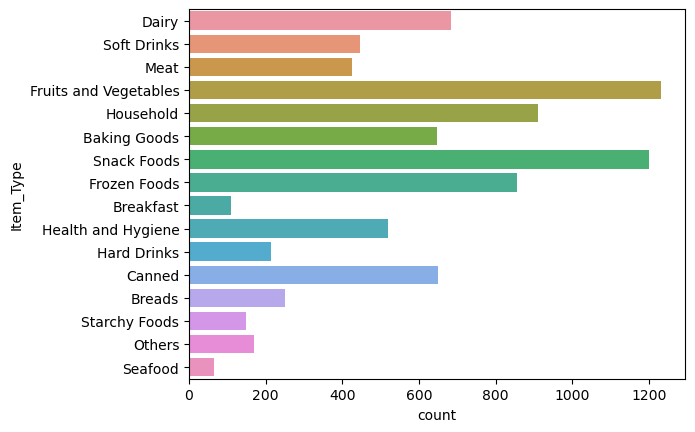

In [783]:
sns.countplot(data = data, y ='Item_Type' ,label ="count")

C:\Users\user\Approam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Item Type')

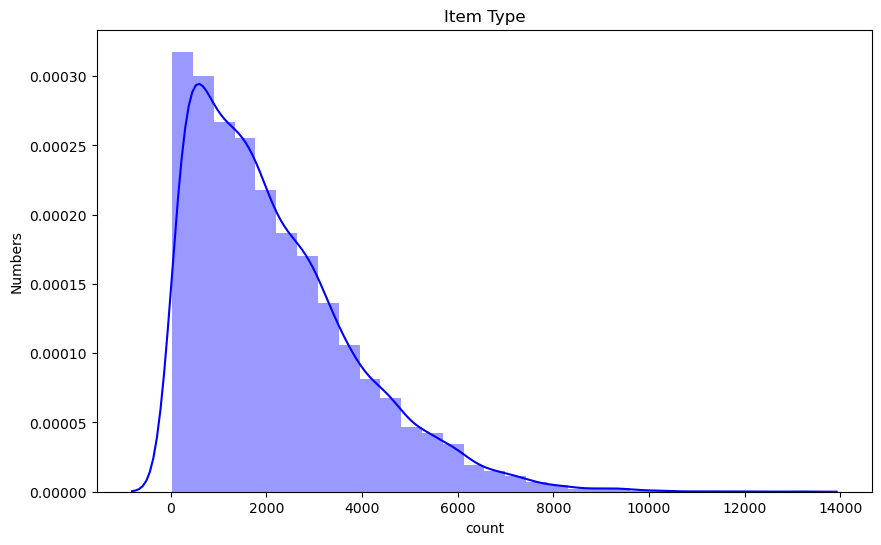

In [784]:
plt.figure(figsize=(10,6))
sns.distplot(data['Item_Outlet_Sales'], hist=True, bins=30, color='blue')
plt.xlabel('count')
plt.ylabel('Numbers')
plt.title('Item Type', fontsize=12)

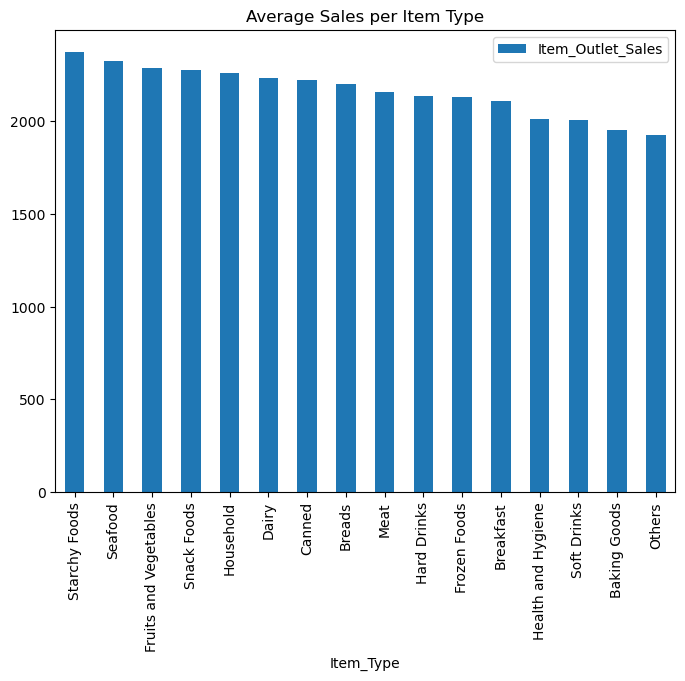

In [785]:
###Let's create a bar chart for the Sales per Item Type
#import matplotlib.pyplot as plt

base = pd.DataFrame(data.groupby(['Item_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending = False))
base.plot.bar(figsize=(8,6))
plt.title('Average Sales per Item Type')
plt.show()

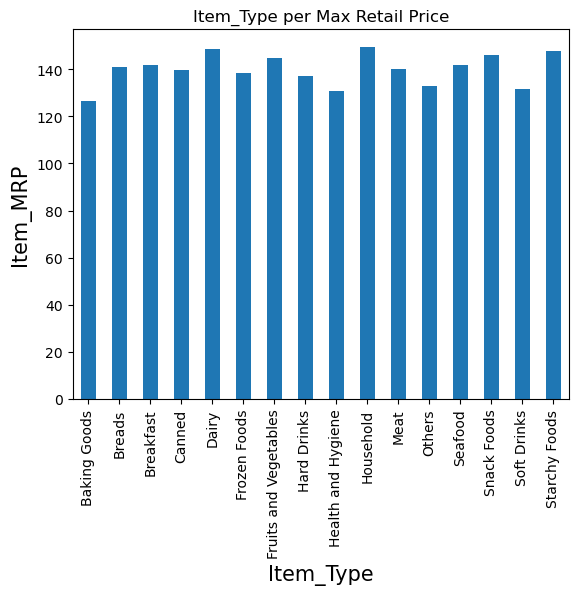

In [786]:
###Let's also create a bar chart for the Sales per Max Retail Price
data.groupby("Item_Type").mean()['Item_MRP'].plot(kind='bar')
plt.ylabel("Item_MRP",fontsize=15)
plt.xlabel("Item_Type",fontsize=15)
plt.title('Item_Type per Max Retail Price')
plt.show()

####  Finding out the Sales performance of each Product at each particular Store Size using Scatterplot

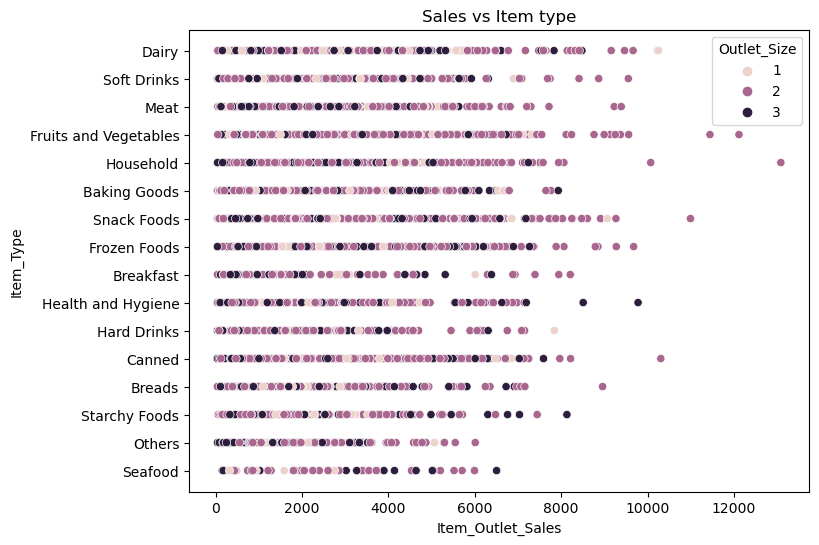

<Figure size 640x480 with 0 Axes>

In [787]:
#Relationship on Outlet size  with Sales per Item Type where High:1, Medium:2 and low: 3
plt.figure(figsize=(8,6))

plt.title('Sales vs Item type')
sns.scatterplot(y=data['Item_Type'],x=data['Item_Outlet_Sales'],hue=data['Outlet_Size'])
plt.ylabel('Item_Type')
plt.xlabel('Item_Outlet_Sales')

plt.show()
plt.tight_layout()

<Figure size 2500x600 with 0 Axes>

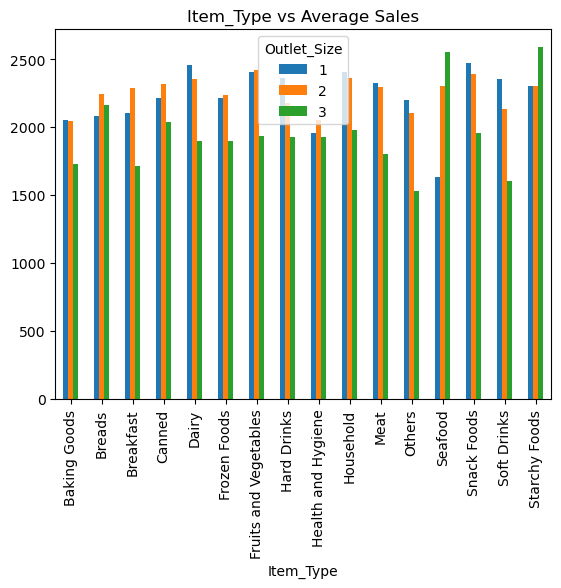

In [788]:
plt.figure(figsize=(25, 6))

dt = pd.DataFrame(data.groupby(['Item_Type','Outlet_Size'])['Item_Outlet_Sales'].mean().unstack(fill_value=0))
dt.plot.bar()
plt.title('Item_Type vs Average Sales')
plt.show()

####  Finding out the Sales of each Product at each particular Store Type using Scatterplot and barchart

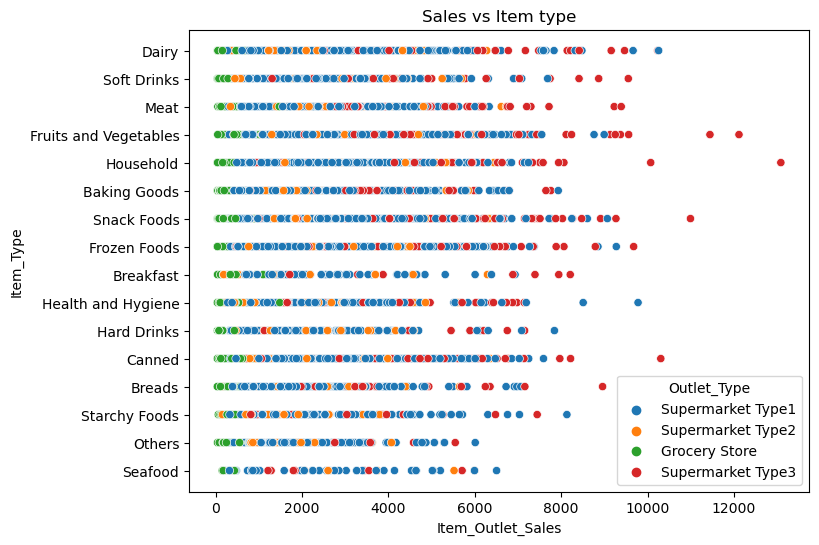

<Figure size 640x480 with 0 Axes>

In [789]:
#

plt.figure(figsize=(8,6))

plt.title('Sales vs Item type')
sns.scatterplot(y=data['Item_Type'],x=data['Item_Outlet_Sales'],hue=data['Outlet_Type'])
plt.ylabel('Item_Type')
plt.xlabel('Item_Outlet_Sales')

plt.show()
plt.tight_layout()

<Figure size 4000x2000 with 0 Axes>

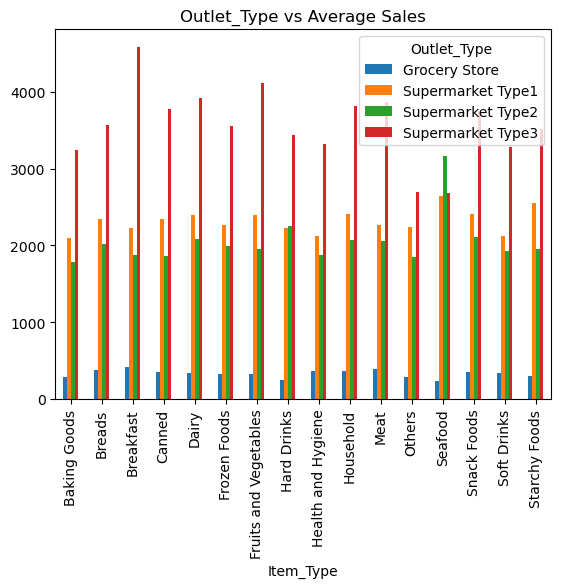

In [790]:
plt.figure(figsize=(40, 20))

dt = pd.DataFrame(data.groupby(['Item_Type','Outlet_Type'])['Item_Outlet_Sales'].mean().unstack(fill_value=0))
dt.plot.bar()
plt.title('Outlet_Type vs Average Sales')
plt.show()

<Figure size 2500x600 with 0 Axes>

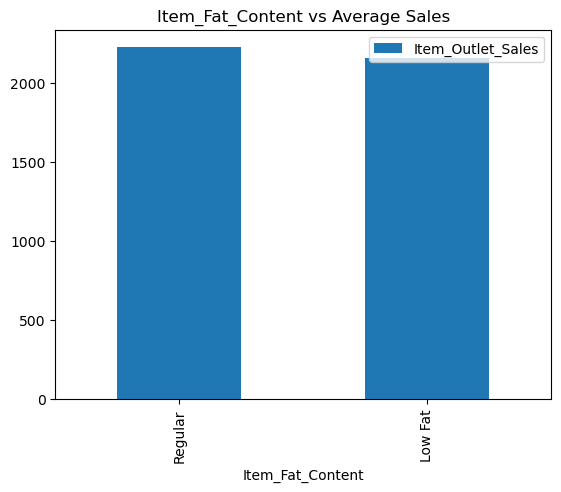

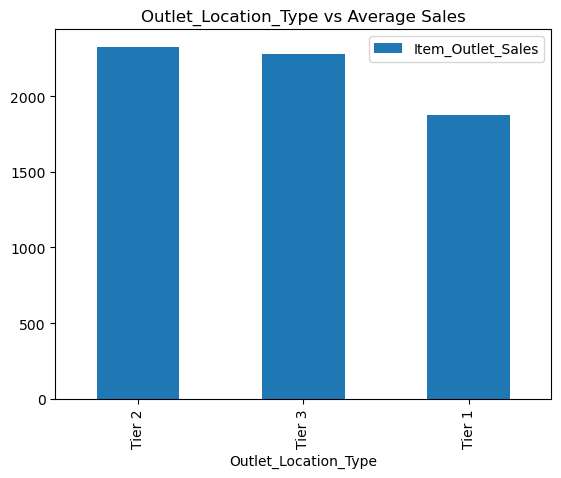

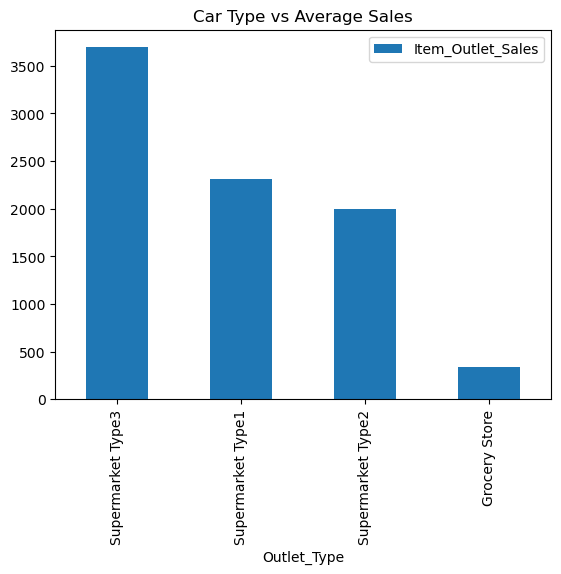

In [791]:
#barchart showing average Sales for Cmpany_name, fuel_type and carbody
plt.figure(figsize=(25, 6))

base = pd.DataFrame(data.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].mean().sort_values(ascending = False))
base.plot.bar()
plt.title('Item_Fat_Content vs Average Sales')
plt.show()

base = pd.DataFrame(data.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending = False))
base.plot.bar()
plt.title('Outlet_Location_Type vs Average Sales')
plt.show()

base = pd.DataFrame(data.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending = False))
base.plot.bar()
plt.title('Car Type vs Average Sales')
plt.show()

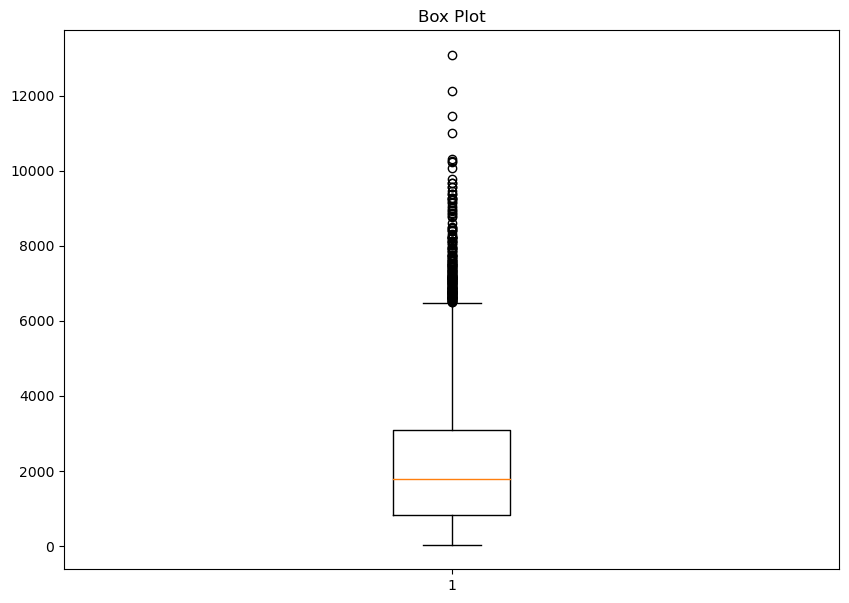

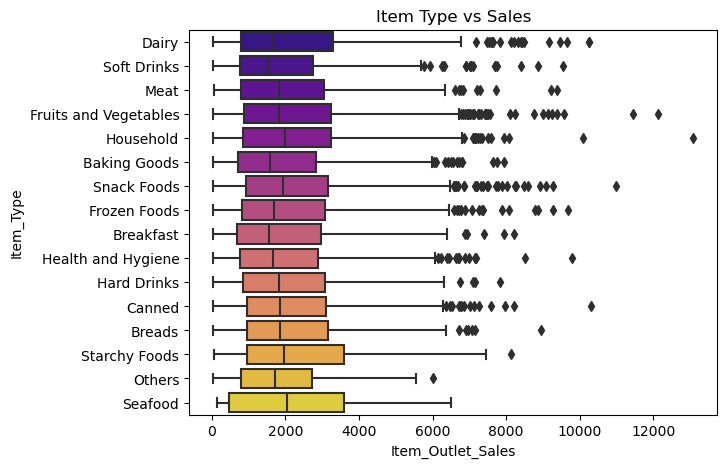

In [792]:
fig = plt.figure(figsize =(10, 7)) 

plt.boxplot(data['Item_Outlet_Sales'])

plt.title("Box Plot")

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,2)
plt.title('Item Type vs Sales')
sns.boxplot(y=data.Item_Type, x=data.Item_Outlet_Sales, palette=("plasma"))

plt.show()


C:\Users\user\Approam\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


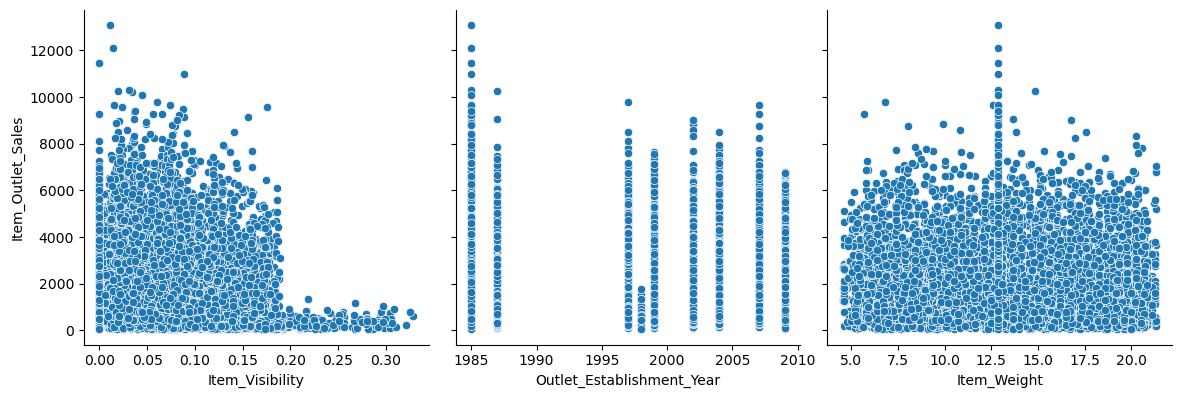

C:\Users\user\Approam\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


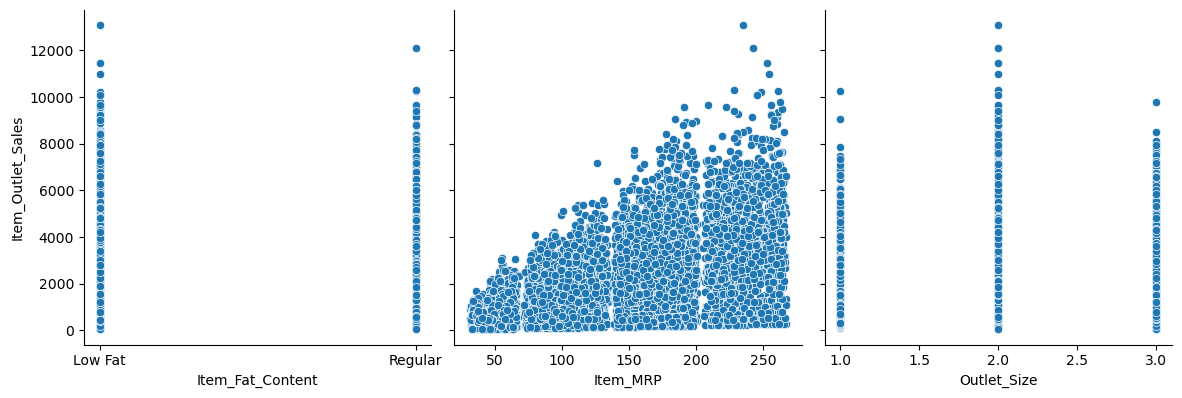

In [793]:
def pp(x,y,z):
    sns.pairplot(data, x_vars=[x,y,z], y_vars='Item_Outlet_Sales', size=4, aspect=1, kind='scatter')
    plt.show()

pp('Item_Visibility', 'Outlet_Establishment_Year', 'Item_Weight')
pp('Item_Fat_Content', 'Item_MRP', 'Outlet_Size')

C:\Users\user\Approam\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


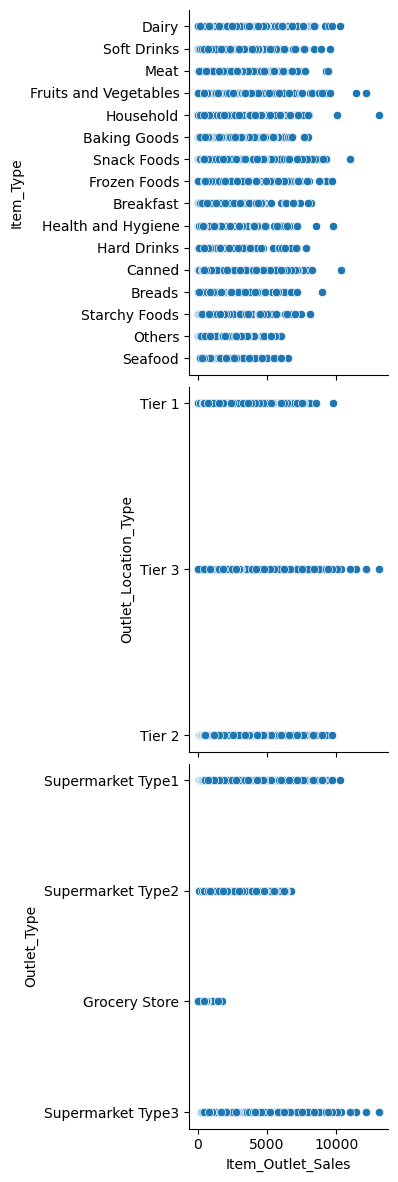

In [794]:
def pp(x,y,z):
    sns.pairplot(data, y_vars=[x,y,z], x_vars='Item_Outlet_Sales', size=4, aspect=1, kind='scatter')
    plt.show()

pp('Item_Type', 'Outlet_Location_Type', 'Outlet_Type')

###### From above graphs on Relationship effect has much impact on Sales, 

The following has a positive effect on sales, the Duration of Years, the  Max. Retail Price(MRP), Item type, and outlet type. for example, if we want more sales then, focus most be on Supermarket Type 3 and Type 2 for higher Sales, likewise is the MRP.

In [795]:
#one-hot encoding
one_hot_encoded_data = pd.get_dummies(data, columns = ['Outlet_Type', 'Outlet_Location_Type','Item_Fat_Content'])
one_hot_encoded_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,2,3735.1380,0,1,0,0,1,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,2,443.4228,0,0,1,0,0,0,1,0,1
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2,2097.2700,0,1,0,0,1,0,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,732.3800,1,0,0,0,0,0,1,0,1
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,1,994.7052,0,1,0,0,0,0,1,1,0


In [796]:
one_hot_encoded_data.shape

(8523, 18)

In [797]:
#checking the correllation with the target
data.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.011550
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

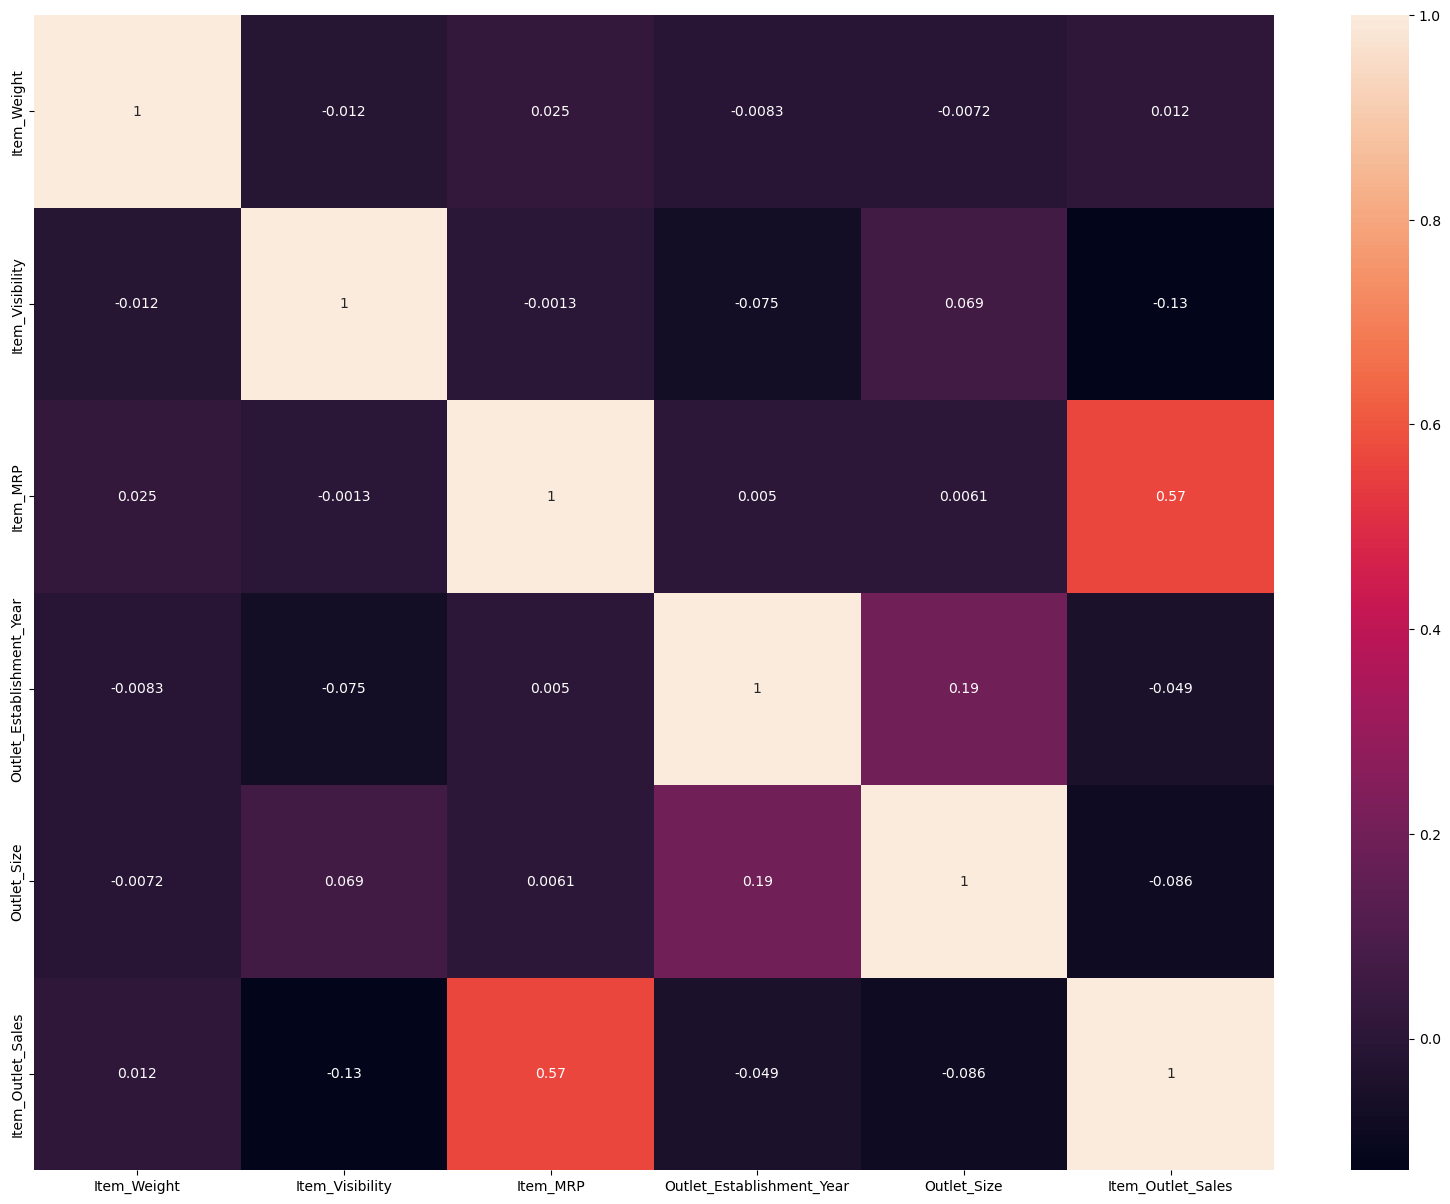

In [798]:
plt.figure(figsize = (20, 15))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [799]:
features= data[['Item_Outlet_Sales', 'Item_Weight','Item_Visibility','Item_MRP', 'Outlet_Establishment_Year','Outlet_Size', 'Item_Type', 'Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type']]
features.head()

,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Type,Item_Fat_Content,Outlet_Location_Type,Outlet_Type
0,3735.1380,9.30,0.016047,249.8092,1999,2,Dairy,Low Fat,Tier 1,Supermarket Type1
1,443.4228,5.92,0.019278,48.2692,2009,2,Soft Drinks,Regular,Tier 3,Supermarket Type2
2,2097.2700,17.50,0.016760,141.6180,1999,2,Meat,Low Fat,Tier 1,Supermarket Type1
3,732.3800,19.20,0.000000,182.0950,1998,2,Fruits and Vegetables,Regular,Tier 3,Grocery Store
4,994.7052,8.93,0.000000,53.8614,1987,1,Household,Low Fat,Tier 3,Supermarket Type1


In [800]:
features.shape

(8523, 10)

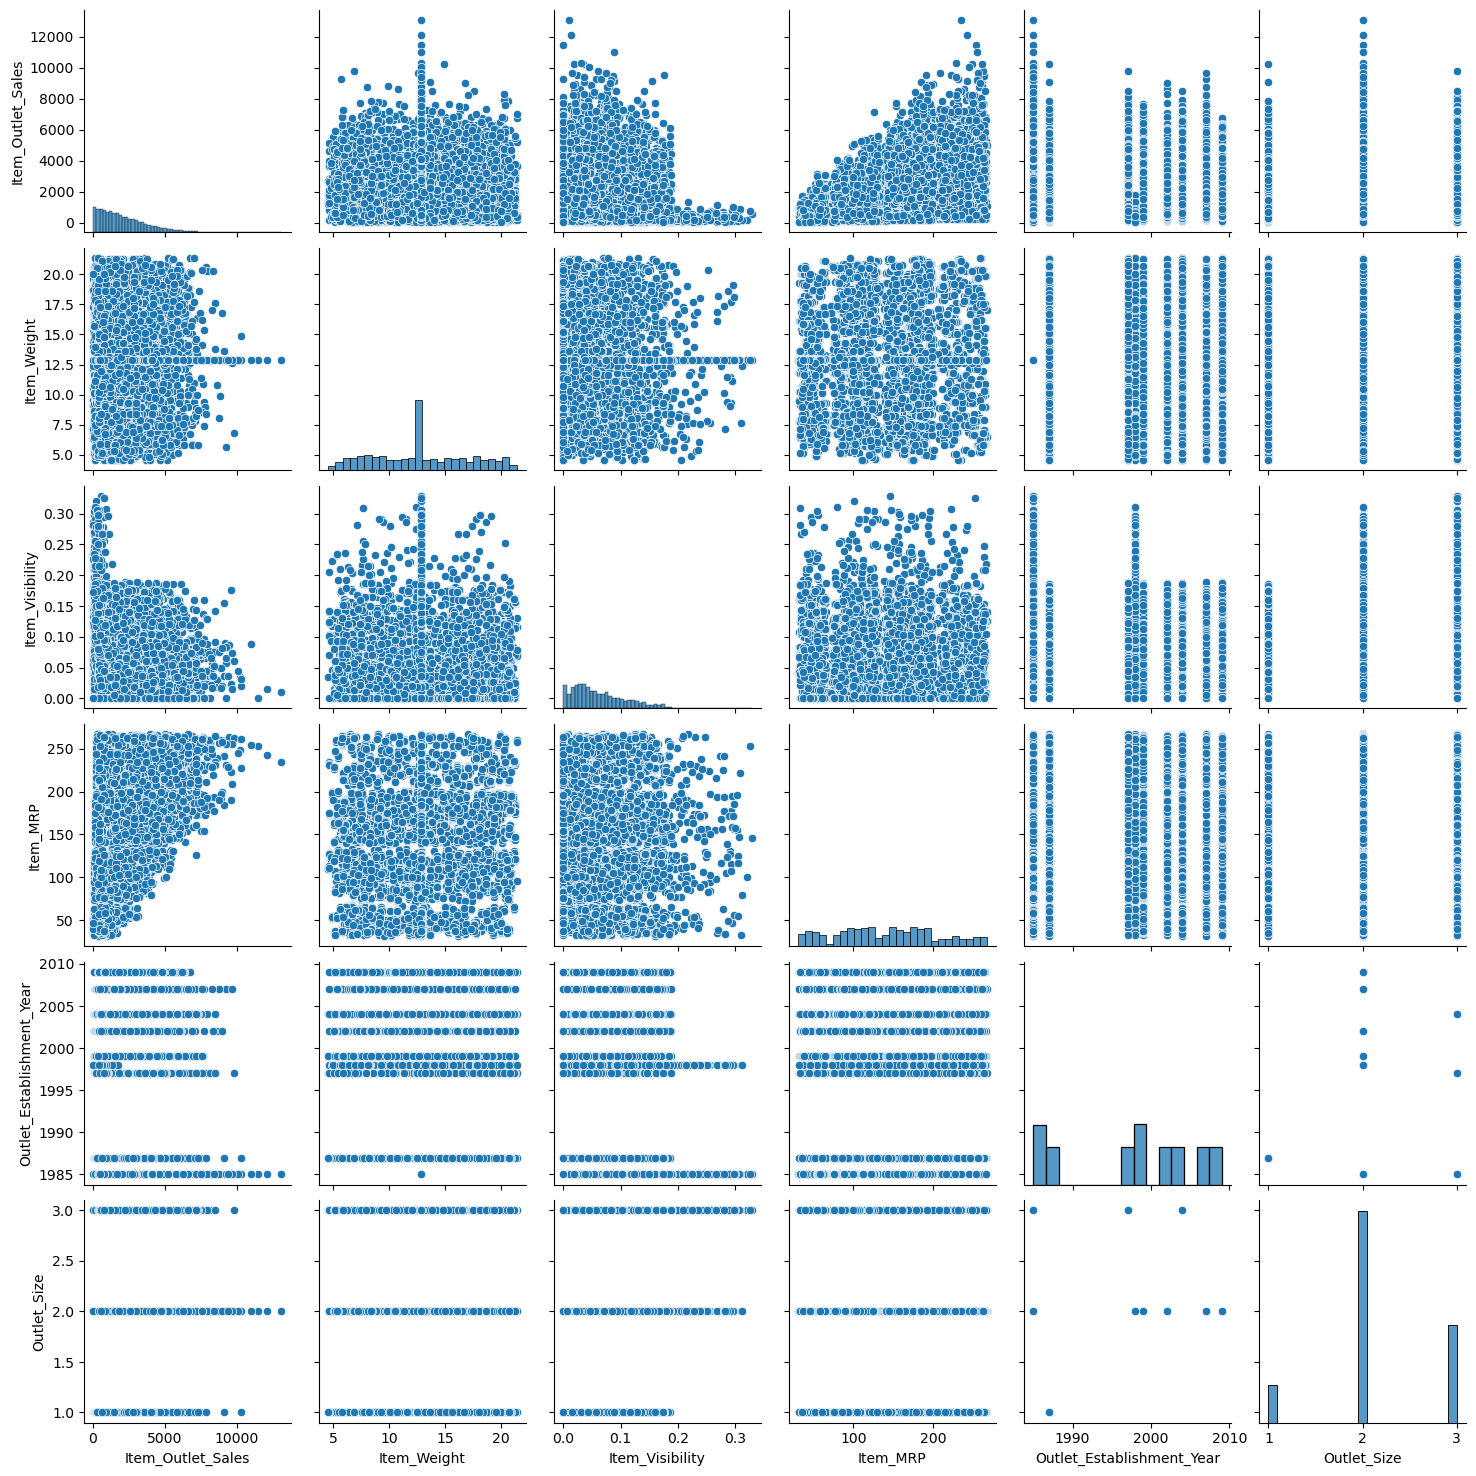

In [801]:
sns.pairplot(features)
plt.show()

### Converting the remaining Categorical variables To Numerical using one-hot encoding

In [802]:
# Defining the map function
def dummies(x,fit):
    temp = pd.get_dummies(fit[x], drop_first = True)
    fit = pd.concat([fit, temp], axis = 1)
    fit.drop([x], axis = 1, inplace = True)
    return fit
# Applying the function to the feature

features = dummies('Item_Type',features)
features = dummies('Item_Fat_Content',features)
features = dummies('Outlet_Location_Type',features)
features = dummies('Outlet_Type',features)

In [803]:
features.head()

,Item_Outlet_Sales,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Breads,Breakfast,Canned,Dairy,...,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Regular,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,3735.1380,9.30,0.016047,249.8092,1999,2,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,443.4228,5.92,0.019278,48.2692,2009,2,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2,2097.2700,17.50,0.016760,141.6180,1999,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,732.3800,19.20,0.000000,182.0950,1998,2,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,994.7052,8.93,0.000000,53.8614,1987,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


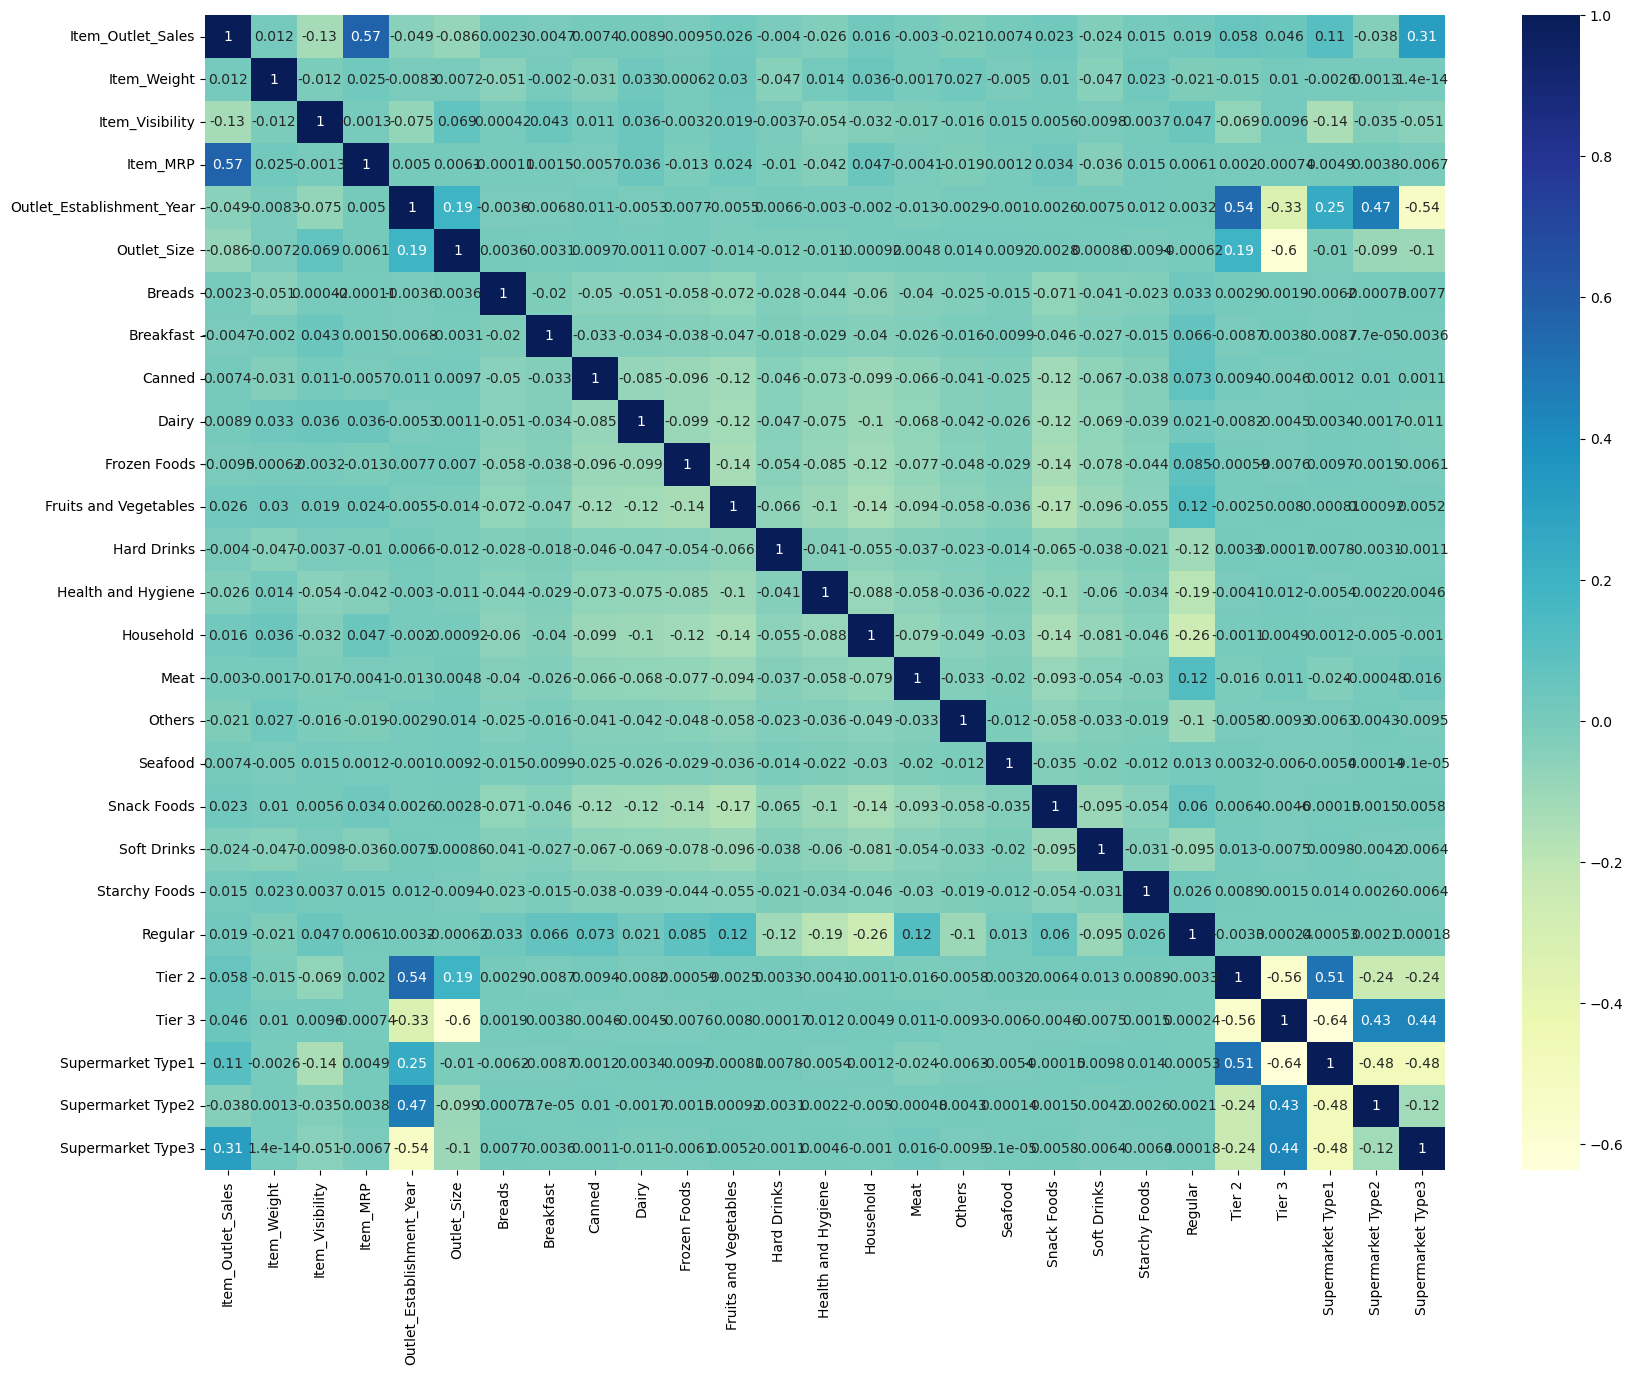

In [804]:
#Correlation using heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(features.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [805]:
#checking the correllation with the target
features.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Supermarket Type2           -0.038059
Health and Hygiene          -0.025587
Soft Drinks                 -0.024040
Others                      -0.021267
Frozen Foods                -0.009482
Breakfast                   -0.004656
Hard Drinks                 -0.003956
Meat                        -0.002995
Breads                       0.002332
Seafood                      0.007380
Canned                       0.007387
Dairy                        0.008858
Item_Weight                  0.011550
Starchy Foods                0.015039
Household                    0.015701
Regular                      0.018719
Snack Foods                  0.022782
Fruits and Vegetables        0.025950
Tier 3                       0.046376
Tier 2                       0.058261
Supermarket Type1            0.108765
Supermarket Type3            0.311192
Item_MRP                     0.567574
Item_Outlet_

In [806]:
#FEATURING ENGINEERING

#features = features[['Item_Outlet_Sales', 'Item_MRP','Supermarket Type3', 'Supermarket Type1', 'Tier 2','Tier 3','Fruits and Vegetables','Snack Foods','Regular','Household','Starchy Foods','Item_Weight']]

### TRAINING OF MODEL

##### Seperating Training Data And Test Data

In [807]:
# This is the feature we want to predict.
y= features.pop('Item_Outlet_Sales')

# these features in the linear regression model. 
X= features

In [808]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [809]:
# Randomly split the dataset into a training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 0)

print("number of test samples :", X_test.shape[0])
print("number of training samples:", X_train.shape[0])

number of test samples : 2557
number of training samples: 5966


In [810]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Breads,Breakfast,Canned,Dairy,Frozen Foods,...,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Regular,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
88,6.305000,0.123116,95.6436,1997,3,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
6813,5.980000,0.043809,146.8418,2007,2,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4046,12.857645,0.072317,160.7920,1985,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8194,12.857645,0.299098,157.8630,1985,3,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8293,9.100000,0.080278,47.2718,2004,3,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


### Build Model

In [811]:
lm= LinearRegression()

In [812]:
lm.fit(X_train, y_train)

LinearRegression()

### Sales Prediction

In [813]:
yhat=lm.predict(X_test)
yhat[0:5]

array([2542.26596566, 2538.78188282, 2142.62311442, 2365.79069336,
       3104.83702989])

In [814]:
y[0:5]

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

### Evaluation

In [815]:
lm.score(X_test, yhat)

1.0

In [816]:
from sklearn.metrics import r2_score 

print("The R2 Score is: ",r2_score(y_test, yhat) * 100 )

The R2 Score is:  56.110664515029015


### GBR hyperparameters

In [817]:
model = GradientBoostingRegressor (n_estimators = 5000, learning_rate = 0.1, max_depth = 10, min_samples_leaf = 3, max_features = 0.1, loss = 'lad', random_state = 0)

In [818]:
model.fit(X_train,y_train)

C:\Users\user\Approam\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(loss='lad', max_depth=10, max_features=0.1,
                          min_samples_leaf=3, n_estimators=5000,
                          random_state=0)

### Prediction of  Sales

In [819]:
yhat_gbr = model.predict(X_test)
yhat_gbr

array([2042.5624695 , 1458.26436271, 2297.22741098, ..., 1354.49650357,
       3559.95500378, 3112.14721539])

### Evalution

In [820]:
print("The R2 Score is: ",r2_score(y_test, yhat_gbr) * 100 )

The R2 Score is:  48.09056697718079


In [821]:
model.score(X_test, yhat)

0.7163105400528551

### Hyper Parameter Tuning: XGBOOST

In [822]:
# Using XGboost algorithm
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)

In [823]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Prediction

In [824]:
yhat_xgb = xgb.predict(X_test)
yhat_xgb

array([2556.0537, 1562.1648, 2254.1055, ..., 1481.0459, 2485.3125,
       3499.2212], dtype=float32)

### Evaluation

In [825]:
print("The R2 Score is: ",r2_score(y_test, yhat_xgb) * 100 )

The R2 Score is:  56.65033226022166


In [826]:
xgb.score(X_test, yhat)

0.8455485678973904

### Preprocessing

In [827]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#df =['Item_Outlet_Sales','Item_Weight','Item_Visibility','Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size']

fit_train= scaler.fit_transform(X_train,y_train)

In [828]:
fit_train

array([[0.10419768, 0.37490608, 0.27129376, ..., 1.        , 0.        ,
        0.        ],
       [0.08484668, 0.13340581, 0.48915993, ..., 1.        , 0.        ,
        0.        ],
       [0.4943522 , 0.22021684, 0.54852288, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.53259899, 0.        , 0.19789922, ..., 1.        , 0.        ,
        0.        ],
       [0.84221494, 0.31940718, 0.38092685, ..., 1.        , 0.        ,
        0.        ],
       [0.56236975, 0.12593333, 0.6390401 , ..., 1.        , 0.        ,
        0.        ]])

###### The Maximum Retail Price appears to have the highest Correlation, also Outlet type(Supermarket Type 3 and 1), and Outlet location

In [829]:
#fit the model
lm = LinearRegression()

In [830]:
lm.fit(X_train,y_train)

LinearRegression()

In [831]:
yhat0=lm.predict(X_test)
yhat0[0:5]

array([2542.26596566, 2538.78188282, 2142.62311442, 2365.79069336,
       3104.83702989])

In [832]:
lm.score(X_test, yhat0)

1.0

### Evalaution

In [833]:
print("The R2 Score is: ",r2_score(y_test, yhat0) * 100 )

The R2 Score is:  56.110664515029015


### OBSERVATION

##### FROM ABOVE THE LINEAR REGRESSION DID BEST WITHOUT THE HYPER PARAMETER TUNING

## DATASET  (TESTING)

In [863]:
df = pd.read_csv(r'C:\Users\user\Downloads\Test.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [864]:
df.shape

(5681, 11)

In [865]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [866]:
df.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,4705.000000,5681,5681.000000,5681,5681.000000,5681,5681.000000,4075,5681,5681
unique,1543,NaN,5,NaN,16,NaN,10,NaN,3,3,4
top,FDQ60,NaN,Low Fat,NaN,Snack Foods,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1
freq,8,NaN,3396,NaN,789,NaN,624,NaN,1862,2233,3717
mean,NaN,12.695633,NaN,0.065684,NaN,141.023273,NaN,1997.828903,NaN,NaN,NaN
std,NaN,4.664849,NaN,0.051252,NaN,61.809091,NaN,8.372256,NaN,NaN,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.990000,NaN,1985.000000,NaN,NaN,NaN
25%,NaN,8.645000,NaN,0.027047,NaN,94.412000,NaN,1987.000000,NaN,NaN,NaN
50%,NaN,12.500000,NaN,0.054154,NaN,141.415400,NaN,1999.000000,NaN,NaN,NaN
75%,NaN,16.700000,NaN,0.093463,NaN,186.026600,NaN,2004.000000,NaN,NaN,NaN


In [867]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### Data Cleaning, Data Wrangling and Preparation

In [868]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [869]:
#evaluate missing data.
missing_data = df.isnull()
missing_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,False


In [870]:
#count missing value per column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Item_Identifier
False    5681
Name: Item_Identifier, dtype: int64

Item_Weight
False    4705
True      976
Name: Item_Weight, dtype: int64

Item_Fat_Content
False    5681
Name: Item_Fat_Content, dtype: int64

Item_Visibility
False    5681
Name: Item_Visibility, dtype: int64

Item_Type
False    5681
Name: Item_Type, dtype: int64

Item_MRP
False    5681
Name: Item_MRP, dtype: int64

Outlet_Identifier
False    5681
Name: Outlet_Identifier, dtype: int64

Outlet_Establishment_Year
False    5681
Name: Outlet_Establishment_Year, dtype: int64

Outlet_Size
False    4075
True     1606
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
False    5681
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
False    5681
Name: Outlet_Type, dtype: int64



In [871]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


In [872]:
#Get the Mean.Value of the column:
mean=df['Item_Weight'].astype(float).mean(axis=0)
mean

12.695633368756374

In [873]:
#Replace NaN with Mean.Value:
df['Item_Weight'].replace(np.nan, mean, inplace=True)

In [874]:
df['Item_Weight'].value_counts().to_frame()

,Item_Weight
12.695633,976
10.500000,57
17.600000,53
15.600000,48
20.250000,47
...,...
7.670000,1
7.000000,1
6.320000,1
6.960000,1


In [875]:
#Understand the uniqueness of the categorical variable
df.Outlet_Size.unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [876]:
#fill NaNs with column mode in 'Outlet_Size' column
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df['Outlet_Size'] 

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
5676     Small
5677    Medium
5678    Medium
5679    Medium
5680    Medium
Name: Outlet_Size, Length: 5681, dtype: object

In [877]:
#Assign each of the uniqueness to numerical values
df['Outlet_Size'] = df['Outlet_Size'].replace(['Medium', 'High', 'Small'], [2, 1, 3])
df['Outlet_Size'][0:10]

0    2
1    2
2    2
3    2
4    2
5    3
6    2
7    2
8    2
9    2
Name: Outlet_Size, dtype: int64

In [878]:
df['Outlet_Size'].value_counts().to_frame()

,Outlet_Size
2,3468
3,1592
1,621


In [879]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at all the missing points in the columns
missing_values_count[:]

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [880]:
df['Item_Fat_Content'].value_counts().to_frame()

,Item_Fat_Content
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [881]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'Regular', 'LF', 'reg', 'low fat'], ['Low Fat', 'Regular', 'Low Fat', 'Regular', 'Low Fat'])
df['Item_Fat_Content'].value_counts().to_frame()

,Item_Fat_Content
Low Fat,3668
Regular,2013


In [884]:
New= df[['Item_Weight','Item_Visibility','Item_MRP', 'Outlet_Establishment_Year','Outlet_Size', 'Item_Type', 'Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Type']]
New.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Type,Item_Fat_Content,Outlet_Location_Type,Outlet_Type
0,20.750000,0.007565,107.8622,1999,2,Snack Foods,Low Fat,Tier 1,Supermarket Type1
1,8.300000,0.038428,87.3198,2007,2,Dairy,Regular,Tier 2,Supermarket Type1
2,14.600000,0.099575,241.7538,1998,2,Others,Low Fat,Tier 3,Grocery Store
3,7.315000,0.015388,155.0340,2007,2,Snack Foods,Low Fat,Tier 2,Supermarket Type1
4,12.695633,0.118599,234.2300,1985,2,Dairy,Regular,Tier 3,Supermarket Type3


In [885]:
New.shape

(5681, 9)

In [886]:
# Defining the map function
def dummies(x,fit):
    temp = pd.get_dummies(fit[x], drop_first = True)
    fit = pd.concat([fit, temp], axis = 1)
    fit.drop([x], axis = 1, inplace = True)
    return fit
# Applying the function to the feature

New = dummies('Item_Type',New)
New = dummies('Item_Fat_Content',New)
New = dummies('Outlet_Location_Type',New)
New = dummies('Outlet_Type',New)

In [887]:
New.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Breads,Breakfast,Canned,Dairy,Frozen Foods,...,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Regular,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.750000,0.007565,107.8622,1999,2,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,2,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,14.600000,0.099575,241.7538,1998,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7.315000,0.015388,155.0340,2007,2,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,12.695633,0.118599,234.2300,1985,2,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1


### TRAINING OF MODEL

##### Seperating Training Data And Test Data

In [888]:

# these features in the linear regression model. 
Xx= New

In [889]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [895]:
y= y.sample(n=5681, random_state=42)

In [896]:
y.shape

(5681,)

In [897]:
Xx.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Breads,Breakfast,Canned,Dairy,Frozen Foods,...,Seafood,Snack Foods,Soft Drinks,Starchy Foods,Regular,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.750000,0.007565,107.8622,1999,2,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,2,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,14.600000,0.099575,241.7538,1998,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7.315000,0.015388,155.0340,2007,2,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,12.695633,0.118599,234.2300,1985,2,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1


In [907]:
# Randomly split the dataset into a training and testing set.
Xx_train, Xx_test, yy_train, y_test = train_test_split(Xx, y, train_size = 0.7, test_size = 0.3, random_state = 0)

print("number of test samples :", Xx_test.shape[0])
print("number of training samples:", Xx_train.shape[0])

number of test samples : 1705
number of training samples: 3976


In [908]:
lm_Test= LinearRegression()

In [909]:
lm_Test.fit(Xx_train, y_train)

LinearRegression()

### Sales Prediction for  Test Dataset

In [910]:
yhat_Test=lm_Test.predict(Xx_test)
yhat_Test[0:5]

array([2012.02190057, 2394.21092339, 1924.4166016 , 2160.27503085,
       2232.44581236])

In [911]:
y[0:5]

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
Name: Item_Outlet_Sales, dtype: float64

### Evalaution

In [912]:
lm_Test.score(Xx_test, yhat_Test)

1.0